In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy as np
import os

#pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)

In [6]:
### ---  Selecting the most relevant columns for further analysis --->

cols_use = [
    "Customers.id", "Customers.fname", "Customers.lname", "Customers.company",
    "Customers.create_date", "Customers.mailing", "Customers.last_modified",
    "Orders.id", "Orders.customer_id", "Orders.fname", "Orders.lname",
    "Orders.company", "Orders.order_number", "Orders.reorder_id",
    "Orders.subtotal", "Orders.tax", "Orders.shipping", "Orders.coupon_id", 
    "Orders.coupon_amount", "Orders.discount_name", "Orders.discount_amount", 
    "Orders.total", "Orders.balance_due",
    "Orders.shipping_carrier", "Orders.shipping_method",  "Orders.shipped_date", 
    "Orders.payment_status", "Orders.payment_date", "Orders.payment_type",
    "Orders.payment_method", "Orders.payment_amount", 
    "Orders.status", "Orders.placed_date", "Orders.updated_date",
    "Order_Items.id", "Order_Items.parent", "Order_Items.product_id",
    "Order_Items.product_name", "Order_Items.qty", "Order_Items.price",
    "Order_Items.cost", "Order_Items.reorder_frequency",
    "Products.id", "Products.status", "Products.vendor", "Products.import_id",
    "Products.name", "Products.display_name", "Products.list_price",
    "Products.price", "Products.sale_price", "Products.cost",
    "Products.last_modified", "Products.taxable", "Products.shopping_brand",
    "Products.shopping_color", "Products.unit", "Products.packaging", 
    "Products.case_qty", "Products.family_id"
]

In [9]:
dataset_name = "customer-segmentation"

df = pd.read_csv("/".join(["../data/raw/", dataset_name, "PBL5recommendationdata.csv"]), usecols=cols_use, encoding="latin1")

C:\Users\Anna\AppData\Local\Temp\ipykernel_29788\3406467169.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/".join(["../data/raw/", dataset_name, "PBL5recommendationdata.csv"]), usecols=cols_use, encoding="latin1")


In [10]:
df.head(8)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.mailing,Customers.last_modified,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency,Products.id,Products.status,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.last_modified,Products.taxable,Products.shopping_brand,Products.shopping_color,Products.unit,Products.packaging,Products.case_qty,Products.family_id
0,797,Christy,Dill,Company0,1426018724,NaN,1437764306,3758,797,Christy,Dill,Company0,3758,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,64.29,NaN,fedex,11|Ground,3.0,1.426019e+09,authorize.net,NaN,64.29,1,1426019099,1.438868e+09,1.426101e+09,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,NaN,2310.0,0.0,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,NaN,44.00,1.463163e+09,1.0,MEDLINE,Green,EA,1 Each / Each,1.0,PF61071
1,3,John,Smith,Company1,1386089139,NaN,1437764354,23,3,John,Smith,Company1,23,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,3.0,1.386090e+09,authorize.net,NaN,29.99,1,1386090455,1.440529e+09,1.386103e+09,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,NaN,177.0,1.0,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,5.0,1.87,1.462370e+09,1.0,MEDLINE,NaN,EA,1 Each / Each,1.0,PF02132
2,3,John,Smith,Company1,1386089139,NaN,1437764354,9531,3,John,Smith,Company1,9531,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,3.0,1.449604e+09,authorize.net,NaN,78.73,3,1449603652,1.450213e+09,NaN,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,NaN,1.0,0.0,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,NaN,52.50,1.463163e+09,1.0,MEDLINE,Blue,CS,800 Each / Case,800.0,PF00342
3,4,James,Anderson,NaN,1386780263,NaN,1437762646,29,4,James,Anderson,NaN,29,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,29.55,NaN,NaN,11|Ground,3.0,1.386780e+09,NaN,Credit Card,29.55,1,1386780263,1.440529e+09,1.386800e+09,1816,29,983.0,Basket for 2-Button Walkers,1,19.56,12.62,NaN,983.0,0.0,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,NaN,12.62,1.462595e+09,1.0,MEDLINE,NaN,EA,1 Each / Each,1.0,PF04970
4,5,Abraham,Pollak,Company3,1386861599,0.0,1437764316,30,5,Abraham,Pollak,Company3,30,NaN,36.05,NaN,9.95,NaN,NaN,NaN,NaN,46.00,NaN,fedex,11|Ground,3.0,1.386862e+09,NaN,Credit Card,46.00,1,1386861599,1.440529e+09,1.386876e+09,40,30,991.0,Tens Units,1,36.05,25.75,NaN,991.0,1.0,1.0,3.0,TENS 3000 Analog Unit,TENS 3000 Analog Unit,50.47,36.05,NaN,25.75,1.462370e+09,1.0,ROSCOE MEDICAL INC,NaN,EA,1 Each / Each,1.0,PF03045
5,5,Abraham,Pollak,Company3,1386861599,0.0,1437764316,226,5,Abe,Pollak,Company3,226,NaN,44.46,NaN,9.95,NaN,NaN,NaN,NaN,54.41,54.41,fedex,11|Ground,0.0,NaN,NaN,NaN,NaN,1,1394380527,1.438868e+09,1.394482e+09,341,226,310.0,"FitRight Ultra Protective Underwear, Large",1,44.46,32.22,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,Abraham,Pollak,Company3,1386861599,0.0,1437764316,1658,5,Abraham,Pollak,Company3,1658,NaN,14.63,NaN,9.95,NaN,NaN,NaN,NaN,24.58,24.58,fedex,11|Ground,3.0,1.410364e+09,Credit Card,Credit Card,24.58,1,1410363655,1.438868e+09,1.410382e+09,2997,1658,799.0,"SensiCare Silk Nitrile Exam Gloves, Dark Blue,...

In [ ]:
date_cols = [
    'Customers.create_date',
    'Customers.last_modified',
    'Orders.placed_date',
    'Orders.payment_date',
    'Orders.updated_date',
    'Orders.shipped_date',
    'Products.last_modified'
]

In [ ]:
# Convert Unix timestamp to datetime

for col in date_cols:
    df[col] = pd.to_datetime(df[col], unit='s').dt.round('s')

In [13]:
# ---  Data Overview --->

display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(4194, 60)

'Description'

,count,mean,min,25%,50%,75%,max,std
Customers.id,4194.0,1796.52,3.0,865.25,1747.5,2698.75,3736.0,1065.68
Customers.create_date,4194,2015-08-30 21:50:33.705769984,2013-12-03 16:45:39,2015-03-25 22:34:54,2015-11-01 21:00:05,2016-03-02 21:43:58.249999872,2016-05-16 17:00:49,NaN
Customers.mailing,2114.0,0.98,0.0,1.0,1.0,1.0,1.0,0.14
Customers.last_modified,4194,2015-12-18 01:06:01.111110912,2015-07-22 09:59:40,2015-07-24 18:41:19.249999872,2016-03-02 21:20:24,2016-03-02 21:53:39.750000128,2016-05-16 17:00:49,NaN
Orders.id,4194.0,9142.98,23.0,4258.0,9641.0,14011.75,17437.0,5276.54
Orders.customer_id,4194.0,1796.52,3.0,865.25,1747.5,2698.75,3736.0,1065.68
Orders.reorder_id,82.0,7389.16,30.0,4537.25,6887.0,10832.0,16201.0,3818.09
Orders.subtotal,4194.0,131.93,2.89,36.75,74.74,139.96,5163.04,231.16
Orders.tax,3737.0,0.8,0.0,0.0,0.0,0.0,132.93,4.86
Orders.shipping,3999.0,7.14,0.0,0.0,9.95,9.95,32.81,4.53


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Customers.id,int64,0,3054,"[2757, 702, 232]"
Customers.fname,object,0,1631,"[Jeffrey, susanna, brent ]"
Customers.lname,object,0,2557,"[Kitt, Nieves, BRETT]"
Customers.company,object,3467,425,"[nan, nan, nan]"
Customers.create_date,datetime64[ns],0,3054,"[2016-02-25 15:37:23, 2016-04-01 18:24:21, 201..."
Customers.mailing,float64,2080,2,"[1.0, 1.0, 1.0]"
Customers.last_modified,datetime64[ns],0,3054,"[2016-03-02 21:23:09, 2015-07-22 10:24:43, 201..."
Orders.id,int64,0,3565,"[13394, 12864, 14916]"
Orders.customer_id,int64,0,3054,"[1018, 3233, 2931]"
Orders.fname,object,0,1636,"[Debbie, Thomas, Qi]"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customers.id                   4194 non-null   int64         
 1   Customers.fname                4194 non-null   object        
 2   Customers.lname                4194 non-null   object        
 3   Customers.company              727 non-null    object        
 4   Customers.create_date          4194 non-null   datetime64[ns]
 5   Customers.mailing              2114 non-null   float64       
 6   Customers.last_modified        4194 non-null   datetime64[ns]
 7   Orders.id                      4194 non-null   int64         
 8   Orders.customer_id             4194 non-null   int64         
 9   Orders.fname                   4194 non-null   object        
 10  Orders.lname                   4194 non-null   object        
 11  Orders.company   

In [16]:
# --- text fields --- 

text_cols = df.select_dtypes(include='object').columns
text_cols

Index(['Customers.fname', 'Customers.lname', 'Customers.company',
       'Orders.fname', 'Orders.lname', 'Orders.company', 'Orders.order_number',
       'Orders.discount_name', 'Orders.shipping_carrier',
       'Orders.shipping_method', 'Orders.payment_type',
       'Orders.payment_method', 'Order_Items.product_name', 'Products.name',
       'Products.display_name', 'Products.shopping_brand',
       'Products.shopping_color', 'Products.unit', 'Products.packaging',
       'Products.family_id'],
      dtype='object')

In [139]:
### ---  Column structuring --- 

id_list = ['Customers.id', 'Orders.id', 'Orders.customer_id', 'Orders.order_number', 'Orders.reorder_id',
           'Orders.coupon_id', 'Orders.reorder_id',
          'Order_Items.id', 'Order_Items.parent', 'Order_Items.product_id', 
          'Products.id',  'Products.import_id', 'Products.family_id'
        ]		


text_list = ['Customers.fname', 'Customers.lname', 'Customers.company', 
            'Orders.company', 'Orders.discount_name', 'Orders.shipping_method', 
            'Order_Items.product_name', 
            'Products.shopping_color'
            ]


integer_list = ['Customers.mailing', 'Order_Items.qty']


category_list = ['Orders.shipping_carrier', 'Orders.shipping_method', 'Orders.discount_name',
                'Orders.payment_method', 'Orders.payment_status', 'Orders.status', 
                'Products.status', 'Products.vendor', 'Products.shopping_brand', 'Products.taxable'
                ]


In [18]:
for col in id_list:
    df[col] = df[col].astype("object")

# !!!!! only after handling missing values in the separate dataframes

#for col in category_list:
#    df[col] = df[col].astype("category")   

In [ ]:
#### ---               df_backup

#df_backup = df.copy() 
#df = df_backup.copy()

#df_backup2 = df.copy() 
#df = df_backup2.copy()


In [78]:
# Find and display orders with mismatched customer names

mismatch = df[
    (df['Orders.lname'] != df['Customers.lname']) |
    (df['Orders.fname'] != df['Customers.fname'])
]

mismatch = mismatch.reset_index(drop=True)

mismatch[[
    'Customers.id',
    'Customers.fname', 'Orders.fname',
    'Customers.lname', 'Orders.lname'
]]

,Customers.id,Customers.fname,Orders.fname,Customers.lname,Orders.lname
0,5,Abraham,Abe,Pollak,Pollak
1,100,Arlene,Luis,Maldonado,Moriel.a
2,185,RAUL,RAUL,IGNACIO RASCON CARRILLO,IGNACIO RASCON CARRILLO
3,185,RAUL,RAUL,IGNACIO RASCON CARRILLO,IGNACIO RASCON CARRILLO
4,308,James,James,James,Watson
5,453,Herbert M,Matthew,Levy,Levy
6,453,Herbert M,Matthew,Levy,Levy
7,708,Brian,Joshua,Kuester,Olson
8,789,Michael D,Michael,Swedberg,Swedberg
9,904,Margaret,Margaret,Pyler,Tyler


In [79]:
## --- Change only the first character, keep the rest unchanged --- 
df['Customers.fname'] = df['Customers.fname'].str.replace(r'^[a-z]', lambda x: x.group(0).upper(), regex=True)
df['Customers.lname'] = df['Customers.lname'].str.replace(r'^[a-z]', lambda x: x.group(0).upper(), regex=True)
## ---  Clean text fields (remove special characters) --- 
df['Customers.lname'] = df['Customers.lname'].str.replace(r'[^a-zA-Z0-9\s\-\'\., ]', '', regex=True)
df['Customers.fname'] = df['Customers.fname'].str.replace(r'[^a-zA-Z0-9\s\-\'\., ]', '', regex=True)

In [80]:
## ---  delete columns with special characters ---
blacklist2 = ['Orders.lname','Orders.fname']   
df = df.drop(columns=blacklist2)

In [81]:
## ---  Check unique counts: identify columns with low cardinality ---

#df['Orders.id'].nunique(), df['Customers.id'].nunique(), 
#df.nunique().sort_values()
df.nunique()[ (df.nunique() > 1) & (df.nunique() < 20) ]

Customers.mailing                 2
Orders.shipping_carrier          11
Orders.shipping_method           14
Orders.payment_status             3
Orders.payment_type               5
Orders.payment_method             4
Orders.status                    10
Order_Items.reorder_frequency     4
Products.status                   5
Products.vendor                   8
Products.import_id               10
Products.taxable                  2
dtype: int64

In [82]:
### --- check columns ---
mismatch = df[(df['Customers.id'] != df['Orders.customer_id'])]
mismatch[['Customers.id']]

,Customers.id


In [83]:
### --- check columns ---
mismatch = df[
    df['Customers.company'].fillna("MISSING") !=
    df['Orders.company'].fillna("MISSING")
]
mismatch[['Customers.company', 'Orders.company']]

,Customers.company,Orders.company
141,Company17,NaN
550,Company41,"Goforth &amp; Assoc, Realtors"
551,Company41,"Goforth &amp; Assoc, Realtors"
767,NaN,bagel king
3124,Company303,NaN
3320,NaN,Marian Family Dantel
3465,NaN,Statesboro Cardiology
3667,Company360,Bacharach Institute Rehab


In [84]:
### --- Update columns ---
#   --- Synchronize 'company' values between Customers and Orders.

# NaN
df['Customers.company'] = df['Customers.company'].fillna(df['Orders.company'])

# Synchronize 
mask_diff = df['Customers.company'] != df['Orders.company']
df.loc[mask_diff, 'Orders.company'] = df.loc[mask_diff, 'Customers.company']

In [85]:
### --- Update columns ---

# Fill missing (NaN) Customers.company values with 'Individual'
df['Customers.company'] = df['Customers.company'].fillna("Individual")

In [86]:
### --- Check Vendor columns ---
df['Products.vendor'].unique()

array([ 1., nan,  2.,  7.,  4.,  5., 11.,  9., 10.])

In [90]:
### --- Update columns ---
mapping = {
    1: "Vendor_A",
    2: "Vendor_B",
    3: "Vendor_C",
    4: "Vendor_D",
    5: "Vendor_E",
    6: "Vendor_F",
    7: "Vendor_G",
    8: "Vendor_H",
    9: "Vendor_I",
    10: "Vendor_J",
    11: "Vendor_K"
}
df["Products.vendor"] = df["Products.vendor"].map(mapping)

In [33]:
df.head(8)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.mailing,Customers.last_modified,Orders.id,Orders.customer_id,Orders.company,Orders.order_number,Orders.reorder_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency,Products.id,Products.status,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.last_modified,Products.taxable,Products.shopping_brand,Products.shopping_color,Products.unit,Products.packaging,Products.case_qty,Products.family_id
0,797,Christy,Dill,Company0,2015-03-10 20:18:44,NaN,2015-07-24 18:58:26,3758,797,Company0,3758,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,64.29,NaN,fedex,11|Ground,3.0,2015-03-10 20:24:59,authorize.net,NaN,64.29,1,2015-03-10 20:24:59,2015-08-06 13:40:10,2015-03-11 19:08:42,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,NaN,2310.0,0.0,Vendor_A,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,NaN,44.00,2016-05-13 18:05:23,1.0,MEDLINE,Green,EA,1 Each / Each,1.0,PF61071
1,3,John,Smith,Company1,2013-12-03 16:45:39,NaN,2015-07-24 18:59:14,23,3,Company1,23,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,3.0,2013-12-03 17:07:35,authorize.net,NaN,29.99,1,2013-12-03 17:07:35,2015-08-25 18:49:43,2013-12-03 20:30:21,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,NaN,177.0,1.0,Vendor_A,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,5.0,1.87,2016-05-04 13:52:35,1.0,MEDLINE,NaN,EA,1 Each / Each,1.0,PF02132
2,3,John,Smith,Company1,2013-12-03 16:45:39,NaN,2015-07-24 18:59:14,9531,3,Company1,9531,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,3.0,2015-12-08 19:40:52,authorize.net,NaN,78.73,3,2015-12-08 19:40:52,2015-12-15 21:04:47,NaT,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,NaN,1.0,0.0,Vendor_A,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,NaN,52.50,2016-05-13 18:05:23,1.0,MEDLINE,Blue,CS,800 Each / Case,800.0,PF00342
3,4,James,Anderson,Individual,2013-12-11 16:44:23,NaN,2015-07-24 18:30:46,29,4,NaN,29,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,29.55,NaN,NaN,11|Ground,3.0,2013-12-11 16:44:23,NaN,Credit Card,29.55,1,2013-12-11 16:44:23,2015-08-25 18:49:43,2013-12-11 22:15:32,1816,29,983.0,Basket for 2-Button Walkers,1,19.56,12.62,NaN,983.0,0.0,Vendor_A,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,NaN,12.62,2016-05-07 04:31:15,1.0,MEDLINE,NaN,EA,1 Each / Each,1.0,PF04970
4,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,2015-07-24 18:58:36,30,5,Company3,30,NaN,36.05,NaN,9.95,NaN,NaN,NaN,NaN,46.00,NaN,fedex,11|Ground,3.0,2013-12-12 15:19:59,NaN,Credit Card,46.00,1,2013-12-12 15:19:59,2015-08-25 18:49:43,2013-12-12 19:13:43,40,30,991.0,Tens Units,1,36.05,25.75,NaN,991.0,1.0,Vendor_A,3.0,TENS 3000 Analog Unit,TENS 3000 Analog Unit,50.47,36.05,NaN,25.75,2016-05-04 13:52:35,1.0,ROSCOE MEDICAL INC,NaN,EA,1 Each / Each,1.0,PF03045
5,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,2015-07-24 18:58:36,226,5,Company3,226,NaN,44.46,NaN,9.95,NaN,NaN,NaN,NaN,54.41,54.41,fedex,11|Ground,0.0,NaT,NaN,NaN,NaN,1,2014-03-09 15:55:27,2015-08-06 13:40:10,2014-03-10 20:10:09,341,226,310.0,"FitRight Ultra Protective Underwear, Large",1,44.46,32.22,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,2015-07-24 18:

In [ ]:
# ---  % null
 
null_value = (df.isna().mean() * 100).sort_values(ascending=False)
null_value.head(15)

Order_Items.reorder_frequency    99.427754
Orders.reorder_id                98.044826
Orders.discount_name             93.276109
Orders.balance_due               91.630901
Orders.discount_amount           91.320935
Orders.payment_method            82.784931
Orders.company                   82.594182
Orders.coupon_id                 78.969957
Orders.coupon_amount             78.969957
Products.sale_price              72.341440
Products.shopping_color          59.465904
Customers.mailing                49.594659
Products.case_qty                37.100620
Products.packaging               31.092036
Products.taxable                 29.446829
dtype: float64

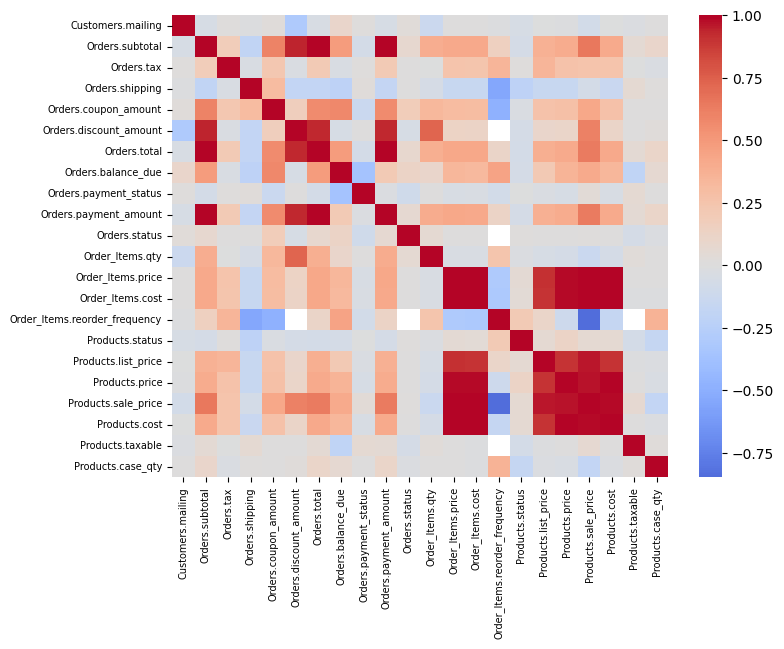

In [91]:
plt.figure(figsize=(8, 6), dpi=100)
corr = df.corr(numeric_only=True)

sns.heatmap(corr, 
            cmap="coolwarm",
            center=0,
            annot=False)

plt.xticks(rotation=90, fontsize=7)
plt.yticks(rotation=0, fontsize=7)

plt.show()

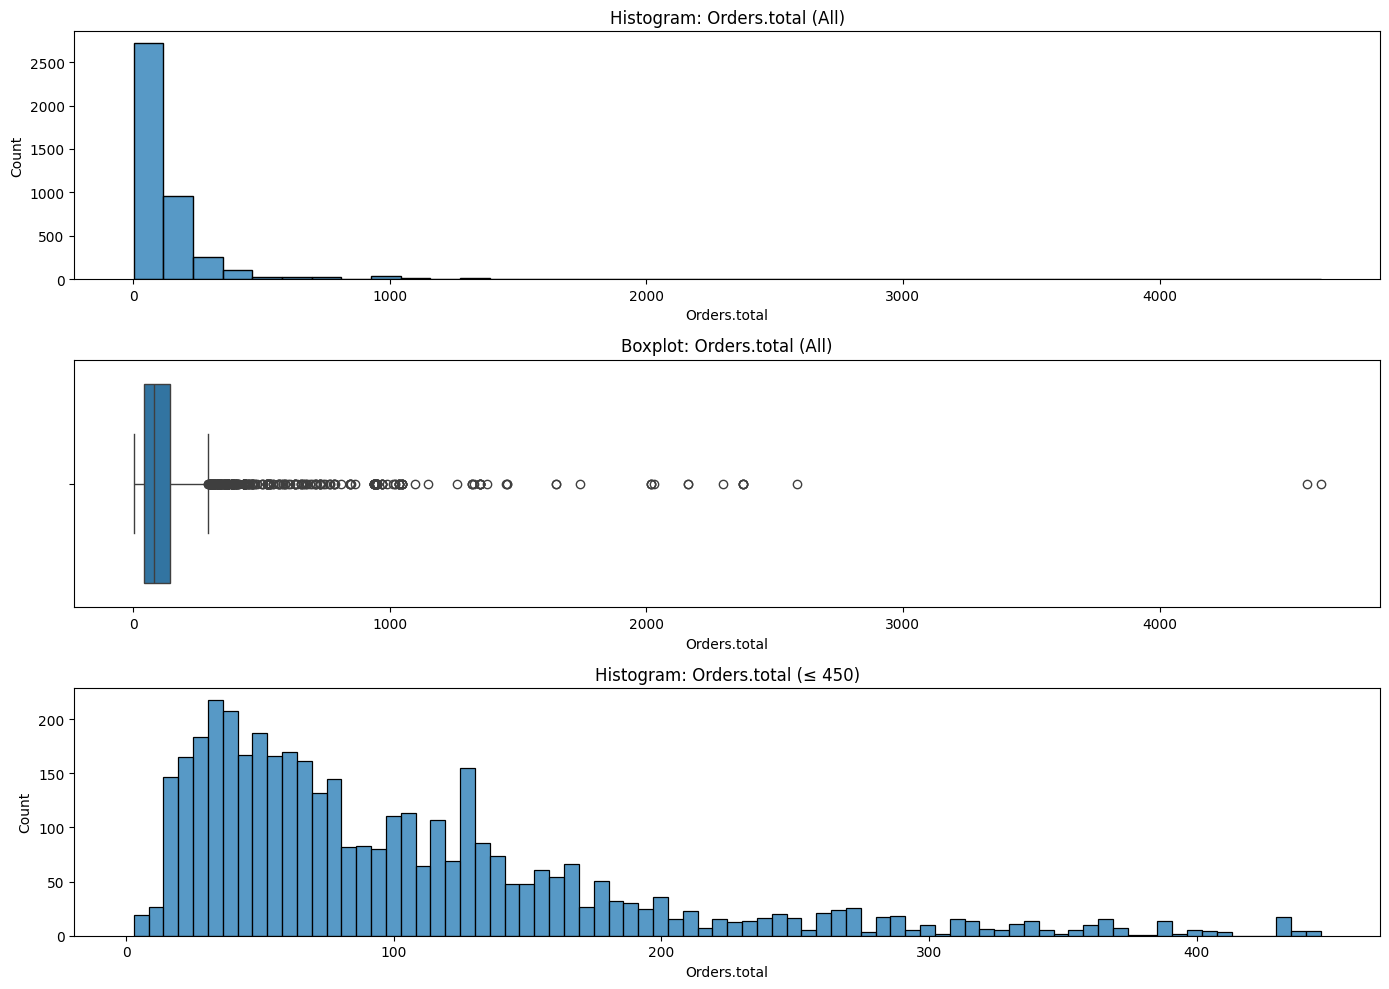

In [37]:
### Review

plt.figure(figsize=(14, 10))

# --- 1. Histogram: all Orders.total ---
plt.subplot(3, 1, 1)
sns.histplot(df['Orders.total'], bins=40)
plt.title('Histogram: Orders.total (All)')

# --- 2. Boxplot: all Orders.total ---
plt.subplot(3, 1, 2)
sns.boxplot(x=df['Orders.total'])
plt.title('Boxplot: Orders.total (All)')

# --- 3. Histogram: Orders.total <= 450 ---
plt.subplot(3, 1, 3)
sns.histplot(df[df['Orders.total'] <= 450]['Orders.total'], bins=80)
plt.title('Histogram: Orders.total (≤ 450)')

plt.tight_layout()
plt.show()

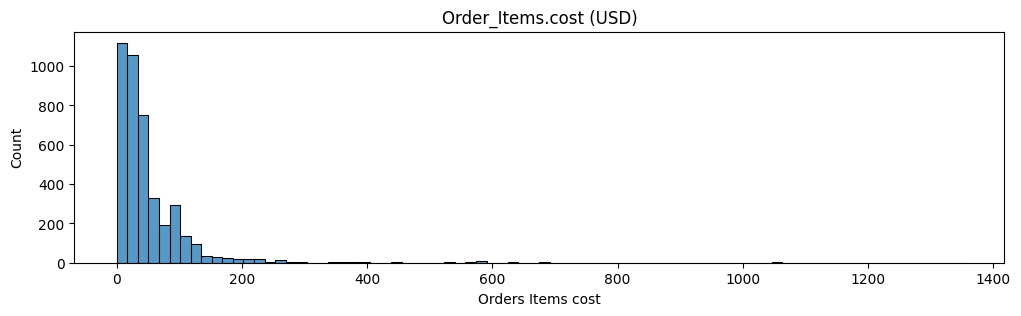

In [43]:
plt.figure(figsize=(12, 3))
sns.histplot(data=df, x='Order_Items.cost', bins=80)
plt.title("Order_Items.cost (USD)")
plt.xlabel("Orders Items cost")
plt.show()

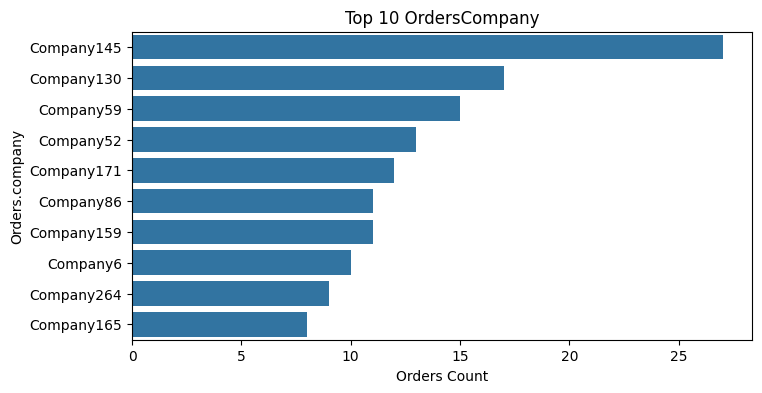

In [44]:
top_company = df['Orders.company'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_company.values, y=top_company.index)
plt.title("Top 10 OrdersCompany")
plt.xlabel("Orders Count")
plt.show()

In [ ]:
df_backup2 = df.copy() 
#df = df_backup2

## SEPARATE DATAFRAMES

In [93]:
### =================================== SEPARATE DATAFRAMES ======================

df_customers = df.filter(like="Customers.")
df_orders = df.filter(like="Orders.")
df_items = df.filter(like="Order_Items.")    
df_products = df.filter(like="Products.")

In [94]:
df_customers.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Customers.id             4194 non-null   object        
 1   Customers.fname          4194 non-null   object        
 2   Customers.lname          4194 non-null   object        
 3   Customers.company        4194 non-null   object        
 4   Customers.create_date    4194 non-null   datetime64[ns]
 5   Customers.mailing        2114 non-null   float64       
 6   Customers.last_modified  4194 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 229.5+ KB


In [95]:
df_customers.head(10)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.mailing,Customers.last_modified
0,797,Christy,Dill,Company0,2015-03-10 20:18:44,NaN,2015-07-24 18:58:26
1,3,John,Smith,Company1,2013-12-03 16:45:39,NaN,2015-07-24 18:59:14
2,3,John,Smith,Company1,2013-12-03 16:45:39,NaN,2015-07-24 18:59:14
3,4,James,Anderson,Individual,2013-12-11 16:44:23,NaN,2015-07-24 18:30:46
4,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,2015-07-24 18:58:36
5,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,2015-07-24 18:58:36
6,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,2015-07-24 18:58:36
7,7,Peggy,Thompson,Individual,2013-12-27 14:52:27,NaN,2015-07-24 18:46:57
8,8,Randy,Pruss,Individual,2014-01-09 21:33:36,NaN,2015-07-24 18:43:41
9,10,Tommy,Smith,Individual,2014-01-23 20:38:36,NaN,2015-07-24 18:45:53


In [96]:
## ---  Fehlende Werte auffüllen   (in df_customers) --- 

#for row in range(len(df_customers)):
#    if pd.isna(df_customers.iloc[row, 5]):  
#        df_customers.iloc[row, 5] = 0
# oder
# --- 
df['Customers.mailing'] = df['Customers.mailing'].fillna(0)   
df_customers = df.filter(like="Customers.") # separate again after filling missing values


In [97]:
################ DUPLIKATES REMOVE ()

# --- ONLY  in df_customers: 
df_customers   = df_customers.drop_duplicates(
    subset=["Customers.id", "Customers.create_date"],
    keep="first"
)

len(df_customers)

### ----------------------------------------------------- df_customers finish!


3054

In [98]:
df_orders = df.filter(like="Orders.") # separate 
df_orders.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Orders.id                4194 non-null   object        
 1   Orders.customer_id       4194 non-null   object        
 2   Orders.company           730 non-null    object        
 3   Orders.order_number      4194 non-null   object        
 4   Orders.reorder_id        82 non-null     object        
 5   Orders.subtotal          4194 non-null   float64       
 6   Orders.tax               3737 non-null   float64       
 7   Orders.shipping          3999 non-null   float64       
 8   Orders.coupon_id         882 non-null    object        
 9   Orders.coupon_amount     882 non-null    float64       
 10  Orders.discount_name     282 non-null    object        
 11  Orders.discount_amount   364 non-null    float64       
 12  Orders.total             4194 non-

In [ ]:
### --- update columns discount ---

# --- in df: fixing

mask = df['Orders.discount_amount'].notna() & (df['Orders.discount_amount'] != 0)
df.loc[mask, 'Orders.discount_name'] = "Other"  # or "Discount"

df['Orders.discount_name'] = df['Orders.discount_name'].fillna("No Discount")


In [102]:
### --- Check unique
df['Orders.discount_name'].unique()

array(['No Discount', 'free shipping', 'Discount', 'Free Shipping',
       'Free shipping', 'adjustment to asking price on Ebay',
       '5 % Discount', 'Amazon didnt charged tax',
       'Wholesale And tax exampt', 'RedOrange Discount ',
       'Freeshipping150', 'freeshipping150', 'Returning Customer',
       'Shipping Included', 'Free Shipping $99+', '7.65', 'Wholesale',
       '9.95', 'Price Match', 'Shipping ', 'Discount | Free Shipping',
       '10577', 'Free Shiping', 'Macth Price Amazon', 'Shipping',
       'Price match', '0.1'], dtype=object)

In [103]:
#import numpy as np 

### --- update columns ---
### --- 'Orders.shipping_method'  ---  text update 

# --- in df_orders: testing
#df_orders['Orders.shipping_method'] = (
#    df_orders['Orders.shipping_method']
#    .str.split('|')
#    .str[-1]
#    .replace("nan", np.nan)
#)

# --- in df: fixing
df['Orders.shipping_method'] = (
    df['Orders.shipping_method']
    .str.split('|')
    .str[-1]
    .replace("nan", np.nan)
)

In [104]:
### --- update columns ---
### --- Orders.payment_method + Orders.payment_type - field union ---

# --- in df_orders: testing
#df_orders['Orders.payment_method'] = df_orders['Orders.payment_method'].fillna(df_orders['Orders.payment_type'])

# in df: fixing
df['Orders.payment_method'] = df['Orders.payment_method'].fillna(df['Orders.payment_type'])

In [105]:
df_orders = df.filter(like="Orders.")  # separate again after filling missing values
df_orders.head()

,Orders.id,Orders.customer_id,Orders.company,Orders.order_number,Orders.reorder_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date
0,3758,797,Company0,3758,NaN,57.20,0.0,9.95,13.0,2.86,No Discount,NaN,64.29,NaN,fedex,Ground,3.0,2015-03-10 20:24:59,authorize.net,authorize.net,64.29,1,2015-03-10 20:24:59,2015-08-06 13:40:10,2015-03-11 19:08:42
1,23,3,Company1,23,NaN,20.00,NaN,9.99,NaN,NaN,No Discount,NaN,29.99,NaN,fedex,Ground,3.0,2013-12-03 17:07:35,authorize.net,authorize.net,29.99,1,2013-12-03 17:07:35,2015-08-25 18:49:43,2013-12-03 20:30:21
2,9531,3,Company1,9531,NaN,68.78,0.0,9.95,NaN,NaN,No Discount,NaN,78.73,NaN,manual,Standard Shipping,3.0,2015-12-08 19:40:52,authorize.net,authorize.net,78.73,3,2015-12-08 19:40:52,2015-12-15 21:04:47,NaT
3,29,4,NaN,29,NaN,19.56,0.0,9.95,NaN,NaN,No Discount,NaN,29.55,NaN,NaN,Ground,3.0,2013-12-11 16:44:23,NaN,Credit Card,29.55,1,2013-12-11 16:44:23,2015-08-25 18:49:43,2013-12-11 22:15:32
4,30,5,Company3,30,NaN,36.05,NaN,9.95,NaN,NaN,No Discount,NaN,46.00,NaN,fedex,Ground,3.0,2013-12-12 15:19:59,NaN,Credit Card,46.00,1,2013-12-12 15:19:59,2015-08-25 18:49:43,2013-12-12 19:13:43


In [106]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Orders.id                4194 non-null   object        
 1   Orders.customer_id       4194 non-null   object        
 2   Orders.company           730 non-null    object        
 3   Orders.order_number      4194 non-null   object        
 4   Orders.reorder_id        82 non-null     object        
 5   Orders.subtotal          4194 non-null   float64       
 6   Orders.tax               3737 non-null   float64       
 7   Orders.shipping          3999 non-null   float64       
 8   Orders.coupon_id         882 non-null    object        
 9   Orders.coupon_amount     882 non-null    float64       
 10  Orders.discount_name     4194 non-null   object        
 11  Orders.discount_amount   364 non-null    float64       
 12  Orders.total             4194 non-

In [107]:
# --- in df_orders: testing
df_orders['Orders.id'].nunique()
#df_orders[df_orders['Orders.payment_amount'].isna()]

3565

In [108]:
df_orders['Orders.id'].value_counts().head(20)

Orders.id
16186    10
12450     9
7357      8
15667     8
941       6
4151      6
10826     6
12994     6
13683     6
15108     6
16429     6
15327     5
2764      5
6967      5
4486      5
3904      5
8763      5
12140     5
8581      5
11314     5
Name: count, dtype: int64

In [109]:
### --- Duplikate checking 
# --- in df_orders: testing
df_orders[df_orders['Orders.id'] == 7357]

,Orders.id,Orders.customer_id,Orders.company,Orders.order_number,Orders.reorder_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date
2058,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20
2059,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20
2060,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20
2061,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20
2062,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20
2063,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20
2064,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20
2065,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20


In [110]:
################ DUPLIKATES REMOVE ()

df_orders = df.filter(like="Orders.")  # separate again after filling missing values

# --- ONLY  in df_orders: 
df_orders   = df_orders.drop_duplicates(
    subset=["Orders.id", "Orders.placed_date"],
    keep="first"          
)
len(df_orders)


3565

In [111]:
df_items = df.filter(like="Order_Items.")     # separate 

In [112]:
df_items.info()
df_items.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Order_Items.id                 4194 non-null   object 
 1   Order_Items.parent             4194 non-null   object 
 2   Order_Items.product_id         4151 non-null   object 
 3   Order_Items.product_name       4194 non-null   object 
 4   Order_Items.qty                4194 non-null   int64  
 5   Order_Items.price              4194 non-null   float64
 6   Order_Items.cost               4191 non-null   float64
 7   Order_Items.reorder_frequency  24 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 262.3+ KB


,count,mean,std,min,25%,50%,75%,max
Order_Items.qty,4194.0,1.858846,8.821959,1.00,1.00,1.00,1.00,500.0
Order_Items.price,4194.0,67.349132,95.571793,1.12,24.03,43.46,74.99,1899.0
Order_Items.cost,4191.0,51.112718,74.155515,0.28,16.20,32.50,59.50,1350.0
Order_Items.reorder_frequency,24.0,1.666667,0.916831,1.00,1.00,1.00,2.00,4.0


In [113]:
df_items.head(8)

,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency
0,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,NaN
1,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,NaN
2,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,NaN
3,1816,29,983.0,Basket for 2-Button Walkers,1,19.56,12.62,NaN
4,40,30,991.0,Tens Units,1,36.05,25.75,NaN
5,341,226,310.0,"FitRight Ultra Protective Underwear, Large",1,44.46,32.22,2.0
6,2997,1658,799.0,"SensiCare Silk Nitrile Exam Gloves, Dark Blue,...",1,14.63,8.36,3.0
7,1797,32,1379.0,Aloetouch Sensitive Personal Cleansing Baby Wipes,1,39.19,27.99,NaN


In [114]:
df_items['cost_price_ratio'] = df_items['Order_Items.cost'] / df_items['Order_Items.price']
df_items['cost_price_ratio'].describe()

C:\Users\Anna\AppData\Local\Temp\ipykernel_29788\437051391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['cost_price_ratio'] = df_items['Order_Items.cost'] / df_items['Order_Items.price']


count    4191.000000
mean        0.695382
std         0.158454
min         0.090045
25%         0.656710
50%         0.724607
75%         0.769231
max         1.803172
Name: cost_price_ratio, dtype: float64

In [115]:
median_ratio = round(df_items['cost_price_ratio'].median(),2)
#median_ratio = df_items['cost_price_ratio'].median()

median_ratio

np.float64(0.72)

In [116]:
#in df_items: testing
df_items['Order_Items.cost'] = df_items['Order_Items.cost'].fillna(df_items['Order_Items.price'] * median_ratio)

C:\Users\Anna\AppData\Local\Temp\ipykernel_29788\446948470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['Order_Items.cost'] = df_items['Order_Items.cost'].fillna(df_items['Order_Items.price'] * median_ratio)


In [ ]:
# in df: fixing
df['Order_Items.cost'] = df['Order_Items.cost'].fillna(df['Order_Items.price'] * median_ratio)

# separate again after filling missing values
df_items = df.filter(like="Order_Items.")    

In [122]:
### check result

#pd.set_option('display.max_columns', None)

df_items.iloc[2372:2374]
df_items.iloc[4022:4024]
df_items.iloc[4049:4051]


,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency
4049,19671,16961,2168.0,Caring Woven Sterile Gauze Sponges,1,15.84,2.88,NaN
4050,19674,16962,NaN,"BUCKET, REPLACEMENT FOR MDS89668XW",1,44.00,31.68,NaN


In [ ]:
### check result
 
#df_items.loc[df_items['Order_Items.product_id'] == '16476', 'Order_Items.cost'] = 1.5
#df.loc[df['Order_Items.product_id'] == '16476', 'Order_Items.cost'] = 1.5

df_items[df_items['Order_Items.product_id'] == 16476] # bearbeten

,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency
2598,13799,11540,16476.0,"Inflatable Exercise Ball - Accessory - 6"" Hand...",1,8.25,1.50,NaN
4023,19772,16750,16476.0,"Inflatable Exercise Ball - Accessory - 6"" Hand...",1,8.25,5.94,NaN


In [124]:
df_items.nunique()   #.sort_values()

Order_Items.id                   4194
Order_Items.parent               3565
Order_Items.product_id           1753
Order_Items.product_name         1821
Order_Items.qty                    23
Order_Items.price                1508
Order_Items.cost                 1338
Order_Items.reorder_frequency       4
dtype: int64

In [125]:
#--- no duplicates

### ----------------------------------------------------- df_items finish!
df_backup3 = df.copy() 

In [132]:
### ---- Process product table - start! 

df_products = df.filter(like="Products.")

In [127]:
df_products.head(8)

,Products.id,Products.status,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.last_modified,Products.taxable,Products.shopping_brand,Products.shopping_color,Products.unit,Products.packaging,Products.case_qty,Products.family_id
0,2310.0,0.0,Vendor_A,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,NaN,44.00,2016-05-13 18:05:23,1.0,MEDLINE,Green,EA,1 Each / Each,1.0,PF61071
1,177.0,1.0,Vendor_A,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,5.0,1.87,2016-05-04 13:52:35,1.0,MEDLINE,NaN,EA,1 Each / Each,1.0,PF02132
2,1.0,0.0,Vendor_A,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,NaN,52.50,2016-05-13 18:05:23,1.0,MEDLINE,Blue,CS,800 Each / Case,800.0,PF00342
3,983.0,0.0,Vendor_A,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,NaN,12.62,2016-05-07 04:31:15,1.0,MEDLINE,NaN,EA,1 Each / Each,1.0,PF04970
4,991.0,1.0,Vendor_A,3.0,TENS 3000 Analog Unit,TENS 3000 Analog Unit,50.47,36.05,NaN,25.75,2016-05-04 13:52:35,1.0,ROSCOE MEDICAL INC,NaN,EA,1 Each / Each,1.0,PF03045
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1379.0,0.0,Vendor_A,3.0,Aloetouch Sensitive Personal Cleansing Baby Wipes,Aloetouch Sensitive Personal Cleansing Baby Wipes,54.87,39.19,NaN,27.99,2016-05-04 13:52:35,1.0,MEDLINE,NaN,CS,1920 Each / Case,1920.0,PF01527


In [128]:
df_products.nunique()

Products.id                1710
Products.status               5
Products.vendor               8
Products.import_id           10
Products.name              1391
Products.display_name      1220
Products.list_price        1260
Products.price             1234
Products.sale_price         111
Products.cost              1225
Products.last_modified       54
Products.taxable              2
Products.shopping_brand     101
Products.shopping_color      98
Products.unit                20
Products.packaging          195
Products.case_qty            76
Products.family_id         1002
dtype: int64

In [ ]:
# --- delete rows with NaN Products.id

df_products = [df_products['Products.id'].notna()]

In [133]:
df_products[df_products.duplicated(subset=['Products.id', 'Products.name'], keep=False)].sort_values(by=['Products.id']).head()

,Products.id,Products.status,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.last_modified,Products.taxable,Products.shopping_brand,Products.shopping_color,Products.unit,Products.packaging,Products.case_qty,Products.family_id
774,19.0,0.0,Vendor_A,3.0,Disposable Forehead Thermometer,Disposable Forehead Thermometer,63.76,45.54,NaN,33.00,2016-05-04 13:52:35,1.0,LIQUID CRYSTAL RESOURCES,NaN,BX,100 Each / Box,100.0,PF04398
1137,19.0,0.0,Vendor_A,3.0,Disposable Forehead Thermometer,Disposable Forehead Thermometer,63.76,45.54,NaN,33.00,2016-05-04 13:52:35,1.0,LIQUID CRYSTAL RESOURCES,NaN,BX,100 Each / Box,100.0,PF04398
3179,20.0,0.0,Vendor_A,3.0,"BariBrief Bariatric Briefs,65""-90""","BariBrief Bariatric Briefs, 65""-90""",140.14,100.10,NaN,77.00,2016-05-13 18:05:23,1.0,MEDLINE,NaN,CS,32 Each / Case,32.0,PF01399
1421,20.0,0.0,Vendor_A,3.0,"BariBrief Bariatric Briefs,65""-90""","BariBrief Bariatric Briefs, 65""-90""",140.14,100.10,NaN,77.00,2016-05-13 18:05:23,1.0,MEDLINE,NaN,CS,32 Each / Case,32.0,PF01399
411,30.0,0.0,Vendor_A,3.0,"Biomask Antiviral Face Masks,Blue","Biomask Antiviral Face Masks, Blue",53.61,38.29,NaN,27.35,2016-05-04 13:52:35,1.0,MEDLINE,Blue,BX,50 Each / Box,50.0,PF07346


In [134]:
################ DUPLIKATES REMOVE ()

# after filling missing values


# --- ONLY  in df_products: 
df_products   = df_products.drop_duplicates(
    subset=["Products.id", "Products.last_modified"],
    keep="first"          
)


### ----------------------------------------------------- df_products finish!
df_backup3 = df.copy() 

In [ ]:
# Select columns with 2–19 unique values — useful for finding potential categorical features to convert

df.nunique()[ (df.nunique() > 1) & (df.nunique() < 30) ]

Customers.mailing                 2
Orders.coupon_id                 21
Orders.discount_name             27
Orders.shipping_carrier          11
Orders.shipping_method           13
Orders.payment_status             3
Orders.payment_type               5
Orders.payment_method             5
Orders.status                    10
Order_Items.qty                  23
Order_Items.reorder_frequency     4
Products.status                   5
Products.vendor                   8
Products.import_id               10
Products.taxable                  2
Products.unit                    20
dtype: int64

In [ ]:
# check / update category_list
category_list

['Orders.shipping_carrier',
 'Orders.shipping_method',
 'Orders.discount_name',
 'Orders.payment_method',
 'Orders.payment_status',
 'Orders.status',
 'Products.status',
 'Products.vendor',
 'Products.shopping_brand',
 'Products.taxable']

In [141]:
# delete columns with special characters

blacklist3 = ['Orders.payment_type', 'Products.display_name', 'Products.packaging'
              ] 
df = df.drop(columns=blacklist3, errors='ignore')

In [142]:
### update order status values # повторно не виконувати!

order_status_map = {
    1:  "Completed",
    0:  "Pending",
    3:  "Shipped",
    4:  "Cancelled",
    5:  "Refunded",
    8:  "Error",
    12: "On Hold",
    14: "Validation Required",
    15: "Unknown"
}

df['Orders.status'] = df['Orders.status'].map(order_status_map).fillna("Unknown")  


In [143]:
### update payment status values # повторно не виконувати!
payment_status_map = {
    3.0: "Paid",
    1.0: "Pending",
    0.0: "Unpaid"
}

df['Orders.payment_status'] = df['Orders.payment_status'].map(payment_status_map).fillna("Unknown")



In [144]:
# update product status values # повторно не виконувати!
product_status_map = {
    0.0: "Active",
    3.0: "Discontinued",
    2.0: "Out of Stock",
    1.0: "New",
    5.0: "Archived"
}

df['Products.status'] = (
    df['Products.status']
    .map(product_status_map)
    .fillna("Unknown")  
)

In [145]:
# update product taxable values # повторно не виконувати!
df['Products.taxable'] = df['Products.taxable'].fillna(2)
mapping = {
    1: "Taxable",
    0: "Not taxable",
    2: "Unknown"
}

df['Products.taxable'] = df['Products.taxable'].map(mapping)

In [146]:
# check / update category_list
category_list

['Orders.shipping_carrier',
 'Orders.shipping_method',
 'Orders.discount_name',
 'Orders.payment_method',
 'Orders.payment_status',
 'Orders.status',
 'Products.status',
 'Products.vendor',
 'Products.shopping_brand',
 'Products.taxable']

In [148]:
# !!!!!  after handling missing values in the separate dataframes

for col in category_list:
    df[col] = df[col].astype("category")   

for col in integer_list:
    df[col] = df[col].astype("int64")  

In [149]:
df_customers = df.filter(like="Customers.")
df_orders = df.filter(like="Orders.")
df_items = df.filter(like="Order_Items.")    
df_products = df.filter(like="Products.")

################ DUPLIKATES REMOVE ()
# df_customers: 
df_customers   = df_customers.drop_duplicates(
    subset=["Customers.id", "Customers.create_date"],
    keep="first"
)

# df_orders: 
df_orders   = df_orders.drop_duplicates(
    subset=["Orders.id", "Orders.placed_date"],
    keep="first"          
)

# df_products: 
df_products = df_products[df_products['Products.id'].notna()] # del NaN!!!

df_products   = df_products.drop_duplicates(
    subset=["Products.id", "Products.last_modified"],
    keep="first"          
)

In [150]:
print("=== MAIN DF ===")
df.info()
print("\n=== CUSTOMERS ===")
df_customers.info()
print("\n=== ORDERS ===")
df_orders.info()
print("\n=== ORDER ITEMS ===")
df_items.info()
print("\n=== PRODUCTS ===")
df_products.info()

=== MAIN DF ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customers.id                   4194 non-null   object        
 1   Customers.fname                4194 non-null   object        
 2   Customers.lname                4194 non-null   object        
 3   Customers.company              4194 non-null   object        
 4   Customers.create_date          4194 non-null   datetime64[ns]
 5   Customers.mailing              4194 non-null   int64         
 6   Customers.last_modified        4194 non-null   datetime64[ns]
 7   Orders.id                      4194 non-null   object        
 8   Orders.customer_id             4194 non-null   object        
 9   Orders.company                 730 non-null    object        
 10  Orders.order_number            4194 non-null   object        
 11  O

In [151]:
import os

# Save all dataframes

df.to_csv("../data/clean/aggregate_df.csv", index=False)

df_customers.to_csv("../data/clean/customers.csv", index=False)
df_orders.to_csv("../data/clean/orders.csv", index=False)
df_items.to_csv("../data/clean/order_items.csv", index=False)
df_products.to_csv("../data/clean/products.csv", index=False)

In [ ]:
####